<h1> <p style="text-align: center;"> Simple Reinforcement Learning in Python</p></h1> 

<img src="imgs/game_intro.png" width="400">

In [1]:
%matplotlib inline

import tqdm.notebook

from utils import *
from IPython.display import clear_output
from time import sleep

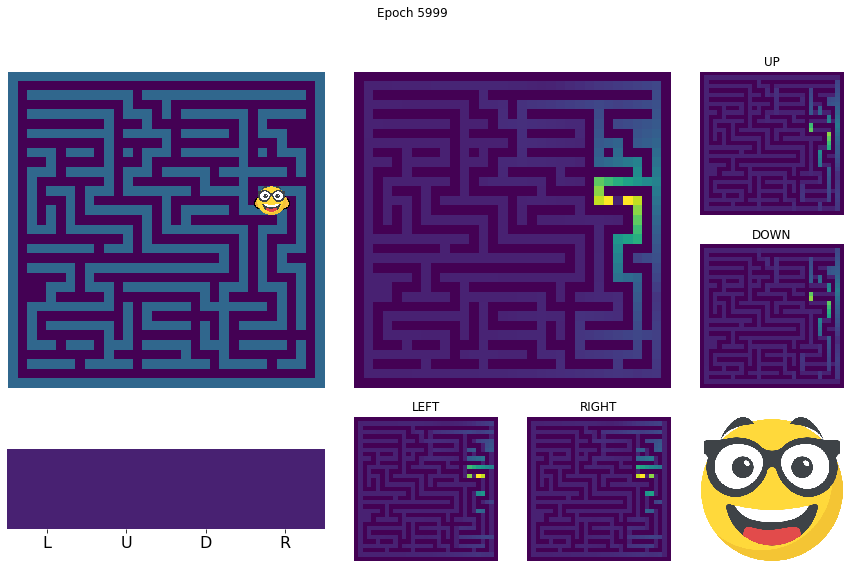

In [3]:
# HYPERPARAMETERS
maze_w = 32
maze_h = 32

# Training Parameters
alpha = 0.1  # Learning rate, keep low if evolving in stochastic environments (0.1)
gamma = 0.9  # Reward glow (0.9)
epochs = 6000  # number of epochs to train for (6000)
max_steps = 3000 # maximum number of steps agent has available per epoch (3000)

# Exploration / Exploitation parameters
max_eps = 1.0  
min_eps = 0.1
eps_tau = epochs/4  # 1/e exploration rate @ eps_gamma epochs

# Create a fixed random maze
world = Maze(width=maze_w, height=maze_h)

# Init Agent with no experience
agent = Agent(world)

# TRAIN
for epoch in tqdm.notebook.tqdm(range(epochs)):
    
    # Set Exploration rate of agent in this epoch
    eps = update_eps(epoch, min_eps, max_eps, eps_tau)

    for s in range(max_steps):

        agent.act(eps)
        agent.reward()
        agent.update_q(alpha, gamma)
            
        # Plot every step if specific epoch
        if epoch+1 == epochs:
            
            axs = plot_dashboard(agent, world, epoch)
            plt.show()

            sleep(0.1)
            if not agent.on_target: clear_output(wait=True)
        
        # Stop stepping if on target
        if agent.on_target:
            break
    
    # Save agent in database
    #if epoch in save_epochs:
        #qBank.append(copy.deepcopy(agent.q))
     
    # Reset agent with newly acquired experience 
    if epoch+1 != epochs:
        agent = agent.respawn()


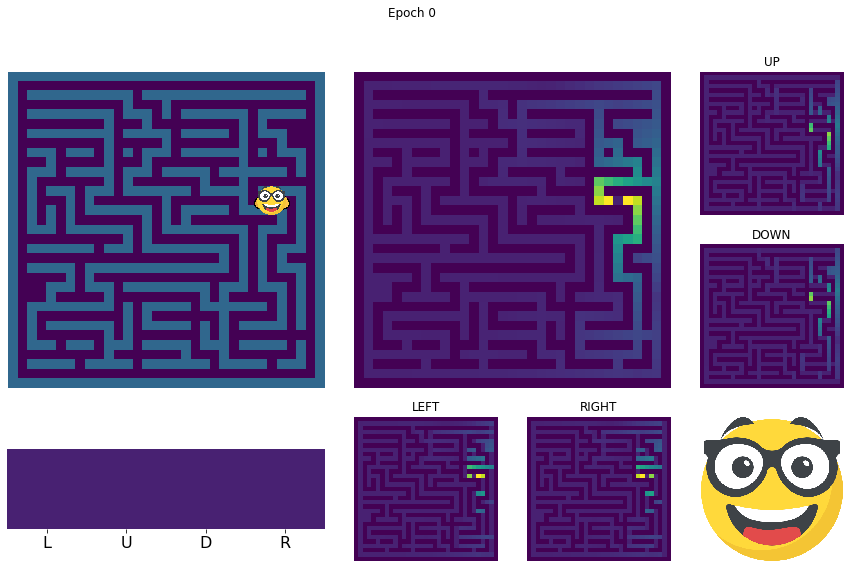

In [4]:
# -- Show off

for i in range(10):

    clone = copy.deepcopy(Agent(world, q=agent.q))

    # Show off agent
    while not clone.on_target:

        clone.act(0)  # move in complete table-exploit
        axs = plot_dashboard(clone, world)
        plt.show()

        sleep(0.1)
        clear_output(wait=True)